In [57]:
import numpy as np
import pandas as pd
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("/home/bruce1996/data/Yi-Fung-Chuang/")
from microbiome_preprocessing import split_tax,filter_taxa_by_prevalence,relative_abundance

### Taxonomy profile pre-processing

In [50]:
path = "/home/bruce1996/data/Yi-Fung-Chuang/within_individual_test/within_individual_test.mpa"
ab_table,tax_table = split_tax(path)
otu_table = relative_abundance(ab_table)

tax = list(otu_table.index)
idx = [bool(re.search('s__\S+', x)) for x in tax]
otu_table = otu_table[idx]
tax_table = tax_table[idx]
#remove strain level information
import operator
rm_tax = list(otu_table.index)
rm_idx = [bool(re.search('s__\S+s__\S+', x)) for x in rm_tax]
idx = list(map(operator.not_, rm_idx))
otu_table = otu_table[idx]
tax_table = tax_table[idx]
#remove low abundance/prevalence taxa
otu_table,tax_table = filter_taxa_by_prevalence(otu_table,tax_table,1)
idx = otu_table.mean(axis=1) > 10 ** -3
otu_table = otu_table[idx]
tax_table = tax_table[idx]

otu_table = otu_table.drop('within_individual_test',axis=1)


In [44]:
probiotics = ["s__Bifidobacterium_animalis","s__Bifidobacterium_bifidum","s__Clostridium_butyricum","s__Lactobacillus_acidophilus",
               "s__Lactobacillus_casei","s__Lactobacillus_gasseri","s__Lactobacillus_johnsonii","s__Lactobacillus_paracasei",
               "s__Lactobacillus_plantarum","s__Lactobacillus_reuteri","s__Lactobacillus_rhamnosus","s__Clostridium_butyricum"]

In [51]:
probiotics_df = otu_table[otu_table.index.isin(probiotics)]
probiotics_df = probiotics_df.T

In [52]:
pre_idx = [bool(re.search('\S+_pretest', x)) for x in list(probiotics_df.index)]
post_idx = [bool(re.search('\S+_posttest', x)) for x in list(probiotics_df.index)]
label = ['pretest'] * probiotics_df.shape[0]
for i in range(len(label)) :
    if post_idx[i] :
        label[i] = 'posttest'

probiotics_df['Class'] = label

In [67]:
id = list(probiotics_df.index)
for i in range(len(id)) :
    id[i] = id[i].split('_')[1]
probiotics_df["Sample_ID"] = id

[Text(0, 0, 'HL1K7YPW'),
 Text(1, 0, 'HTM4Y3E8'),
 Text(2, 0, 'IR3RAXJPW'),
 Text(3, 0, 'R1DT02HM'),
 Text(4, 0, 'R38RVSPD'),
 Text(5, 0, 'R3RAXJPW'),
 Text(6, 0, 'R4E3AWTR'),
 Text(7, 0, 'R721T40A'),
 Text(8, 0, 'RAN30TW8'),
 Text(9, 0, 'RRCP23N5'),
 Text(10, 0, 'RRTN9MX1')]

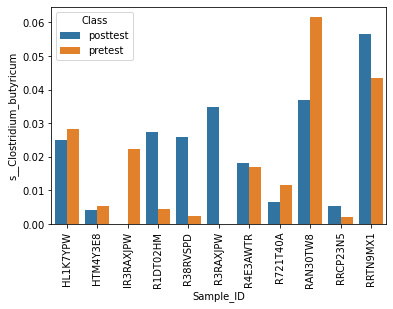

In [71]:
ax = sns.barplot(x="Sample_ID", y="s__Clostridium_butyricum",hue='Class' ,data=probiotics_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)